In [1]:
import osmuf as ouf

In [2]:
# dictionary of places of interest for convenience, 
places = {0:{'name':'buenos_aires', 'coordinates':(-34.5798,-58.4422),},
          1:{'name':'kaduna', 'coordinates':(10.53364, 7.37360),},
          2:{'name':'margery_street', 'coordinates':(51.5266,-0.1109),},
          3:{'name':'posadas', 'coordinates':(-27.37577,-55.90059),},
          4:{'name':'welwyn_garden_city', 'coordinates':(51.7938,-0.18645),},
          5:{'name':'hayes_lane', 'coordinates':(51.39425,-0.003),}
         }

# bounding box half-distance in meters
distance=500

In [3]:
place=places[5]

place_name=place['name']
point=place['coordinates']

# 1. Generate the data

In [4]:
study_area = ouf.study_area_from_point(point, distance)
city_blocks = ouf.city_blocks_from_point(point, distance)
buildings = ouf.buildings_from_gdf(city_blocks)
street_graph = ouf.street_graph_from_gdf(city_blocks)
streets = ouf.streets_from_street_graph(street_graph)

# 2. Process the data

In [5]:
city_blocks, city_blocks_gross = ouf.gen_city_blocks_gross(street_graph, city_blocks)
city_blocks_form_factor = ouf.form_factor(city_blocks)

In [6]:
buildings = ouf.join_buildings_city_block_id(buildings, city_blocks)
buildings = ouf.join_buildings_street_id(buildings, streets)

In [7]:
city_blocks = ouf.join_city_blocks_building_data(city_blocks, buildings)

# 3. Show the data

## 1. Block Size

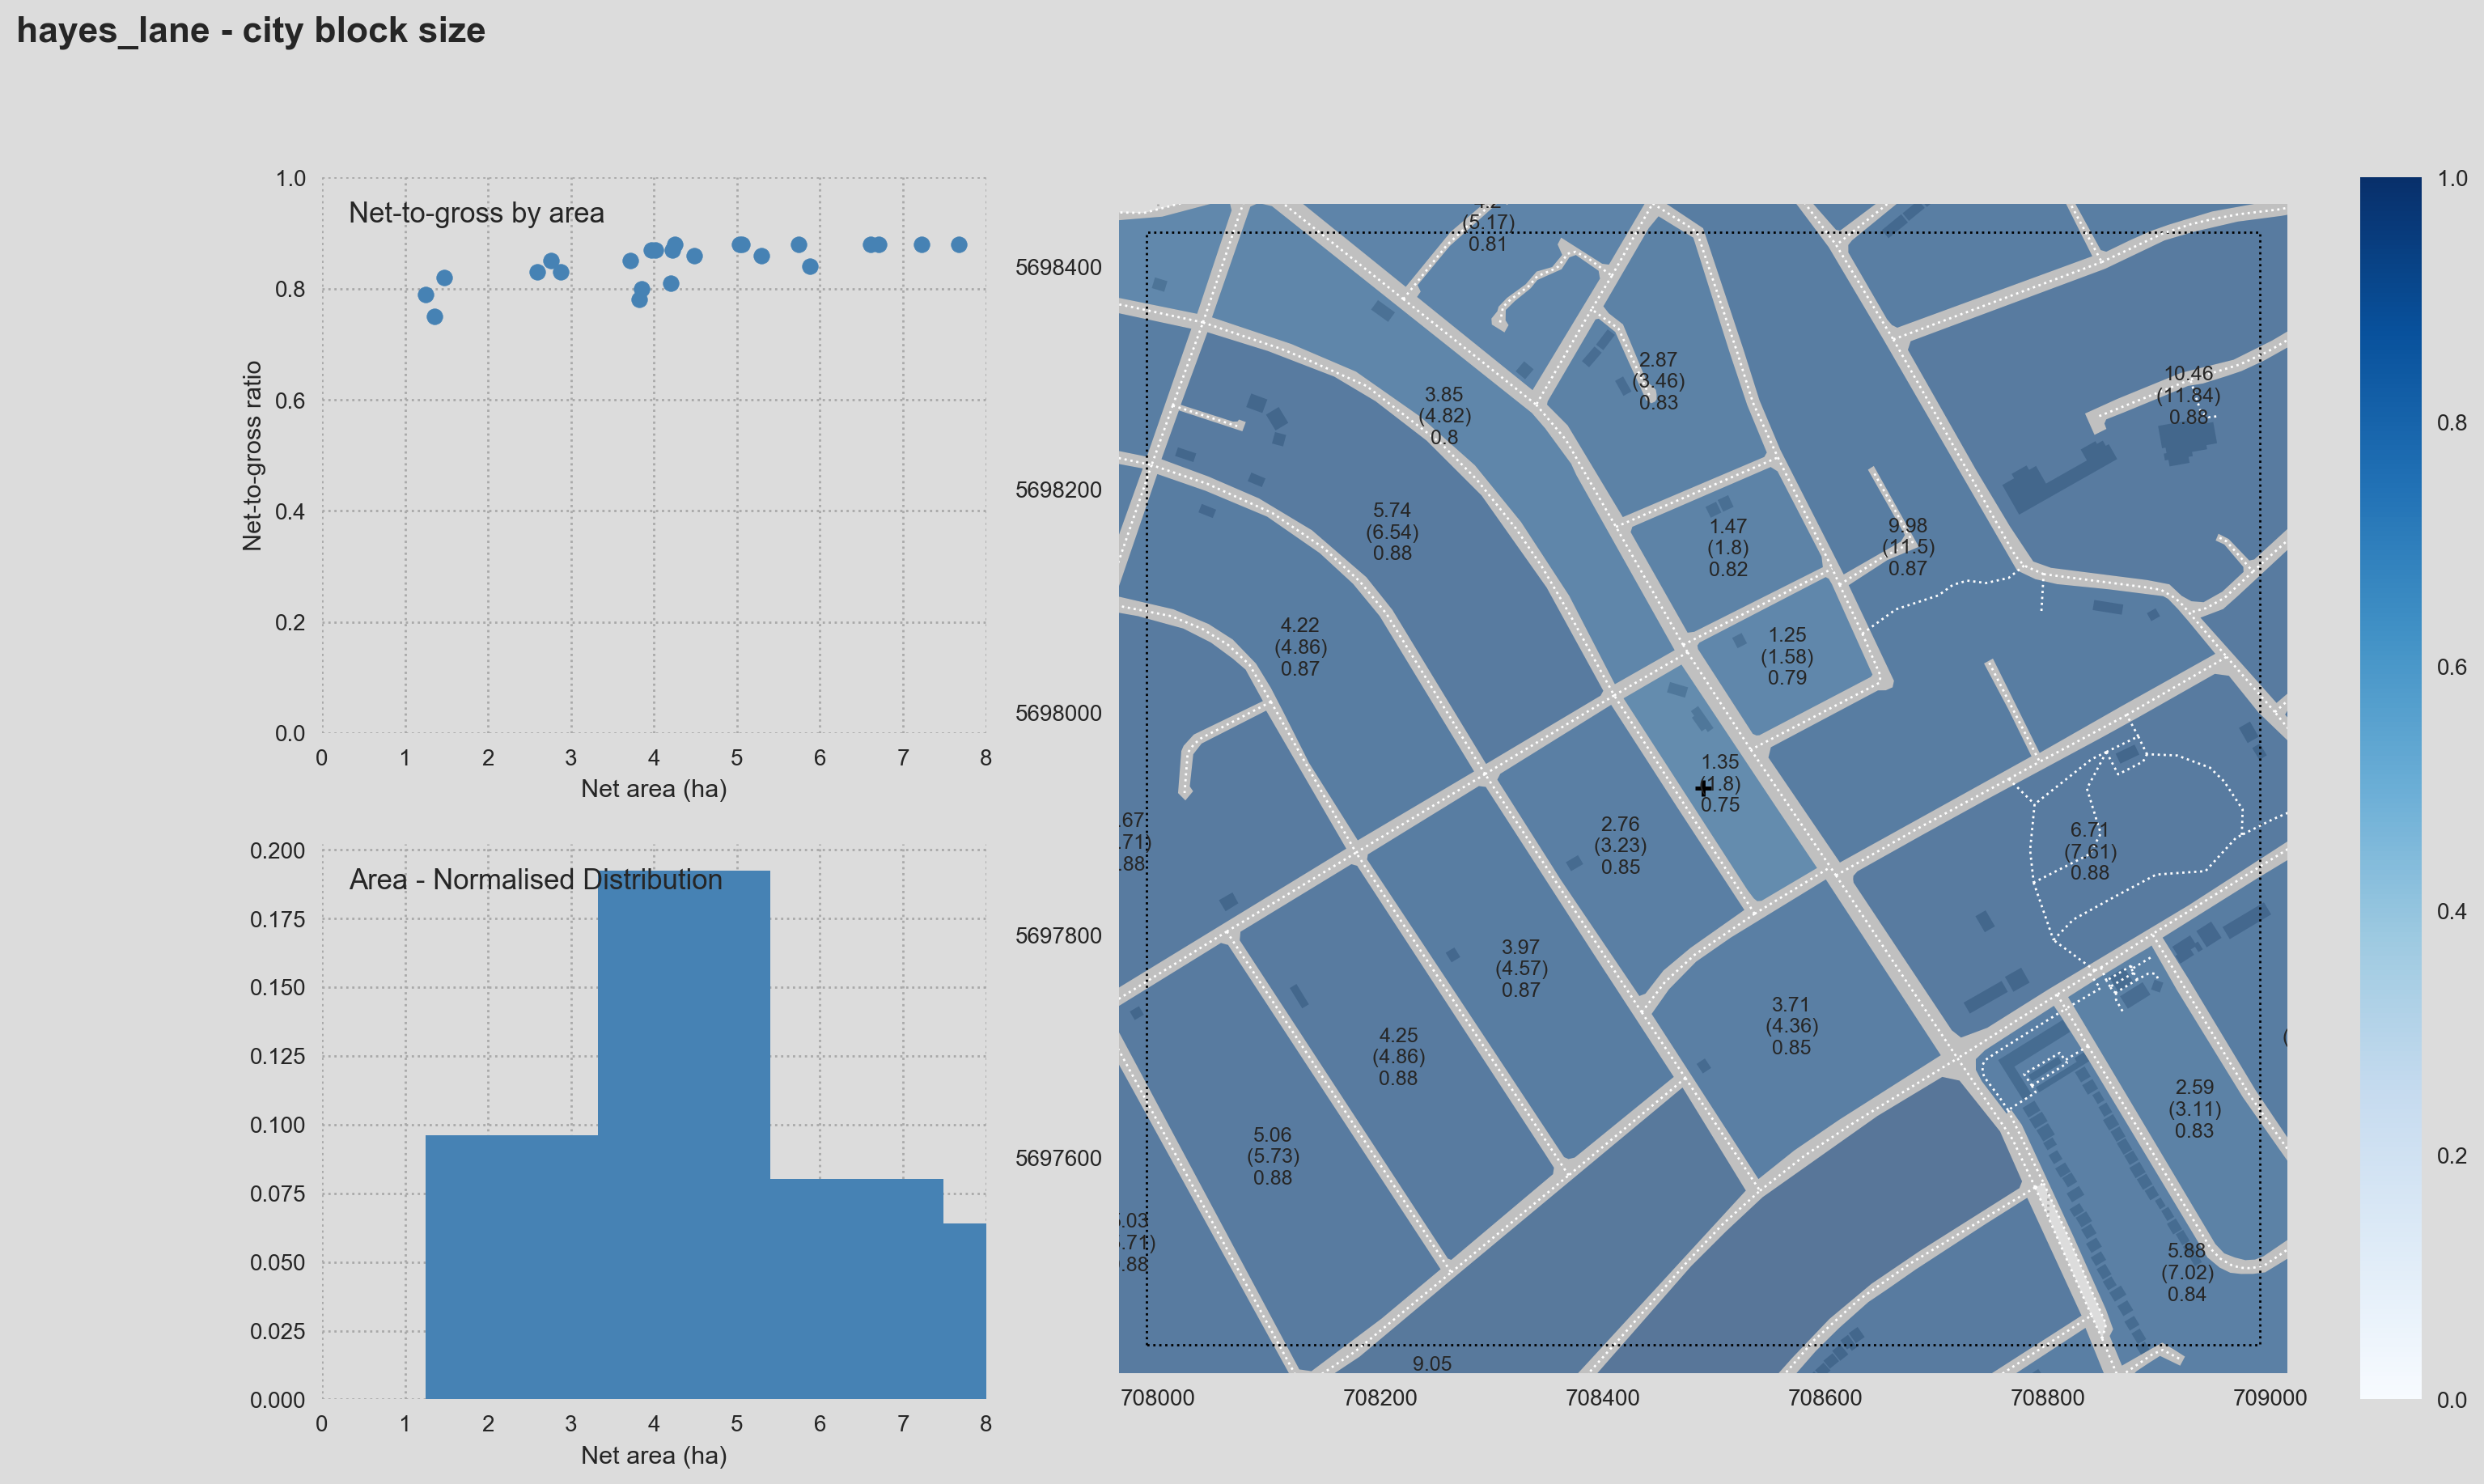

In [8]:
fig, ax = ouf.layout_3_plots()
fig.suptitle(place_name + ' - city block size', fontsize=16, fontweight='bold', ha='left', x=0.02)

ouf.ax_block_ntg_to_size(ax[0], city_blocks)
ouf.ax_block_area_distribution(ax[1], city_blocks)
ouf.ax_map_block_size(ax[2], study_area, streets, city_blocks_gross, city_blocks, buildings)

fig.savefig('../local_images/00_blocks_size_{}.png'.format(place_name), transparent=False,
            dpi=200, bbox_inches="tight", facecolor='gainsboro')

## 2. Form Factor

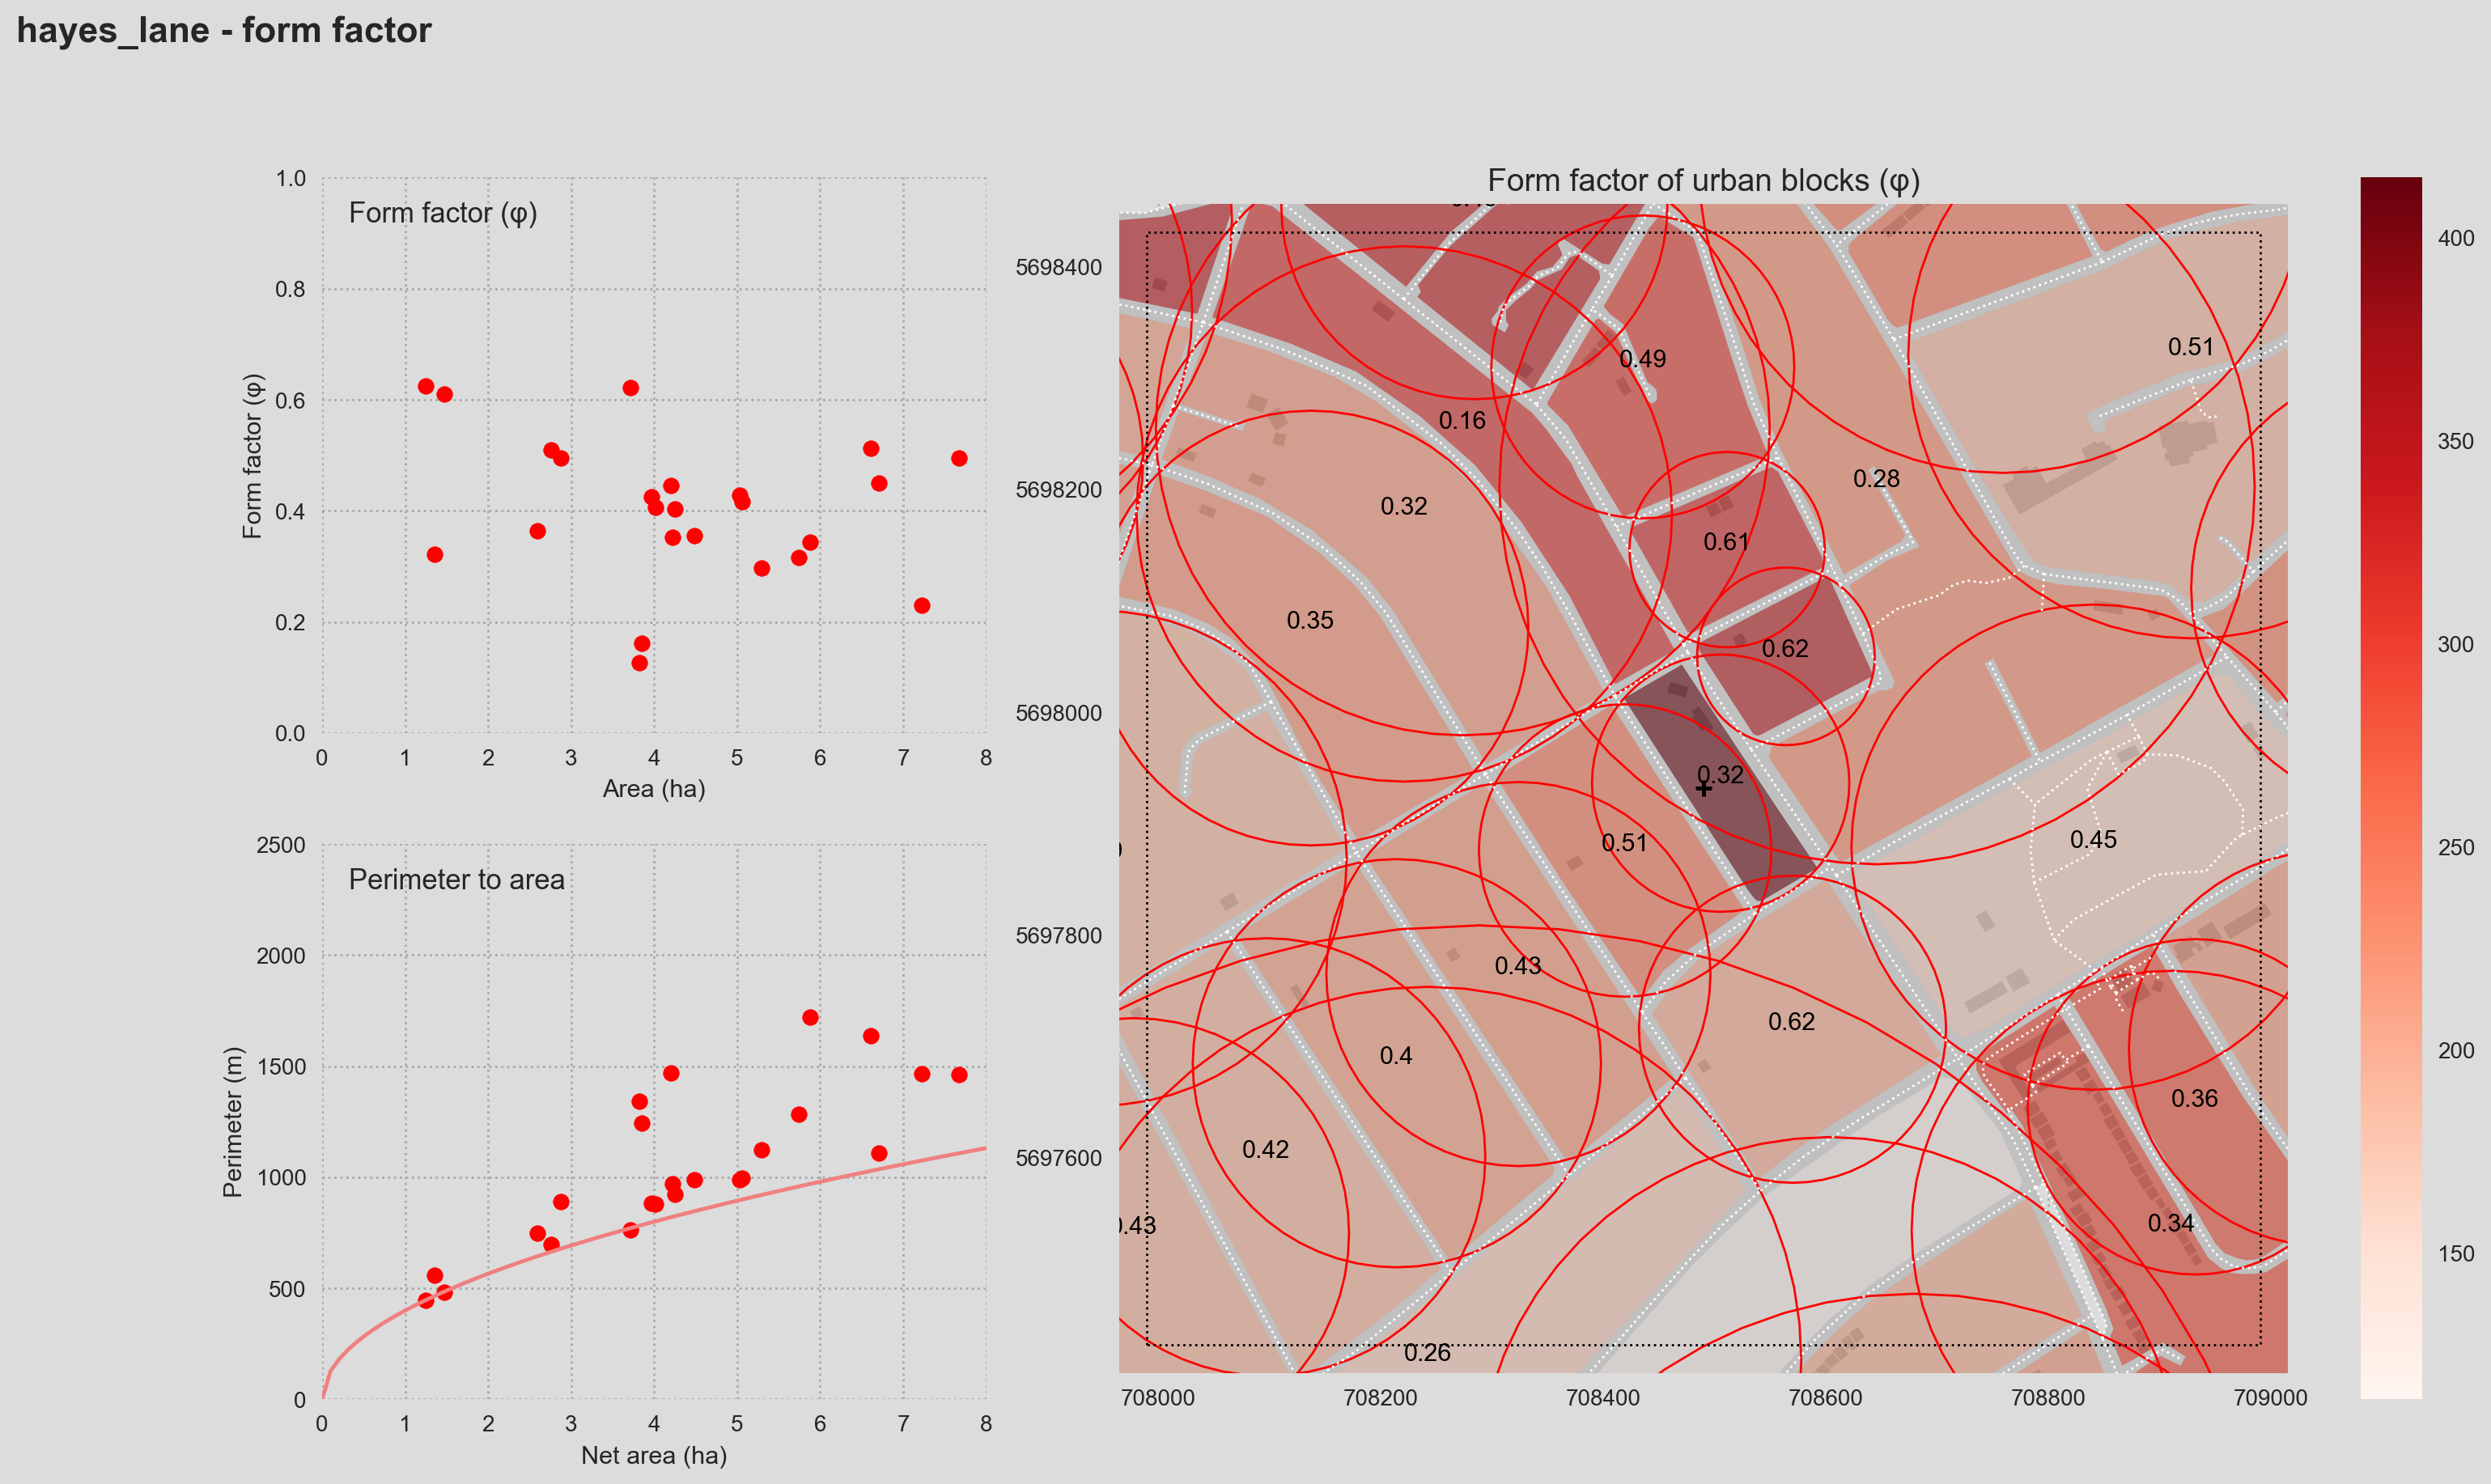

In [9]:
fig, ax = ouf.layout_3_plots()
fig.suptitle(place_name + ' - form factor', fontsize=16, fontweight='bold', ha='left', x=0.02)

ouf.ax_form_factor_to_area(ax[0], city_blocks_form_factor)
ouf.ax_block_perimeter_to_area(ax[1], city_blocks)
ouf.ax_map_form_factor(ax[2], study_area, streets, city_blocks_gross, city_blocks, buildings, city_blocks_form_factor)

fig.savefig('../local_images/01_blocks_form_factor_{}.png'.format(place_name), transparent=False,
            dpi=200, bbox_inches="tight", facecolor='gainsboro')

## 3. GSI

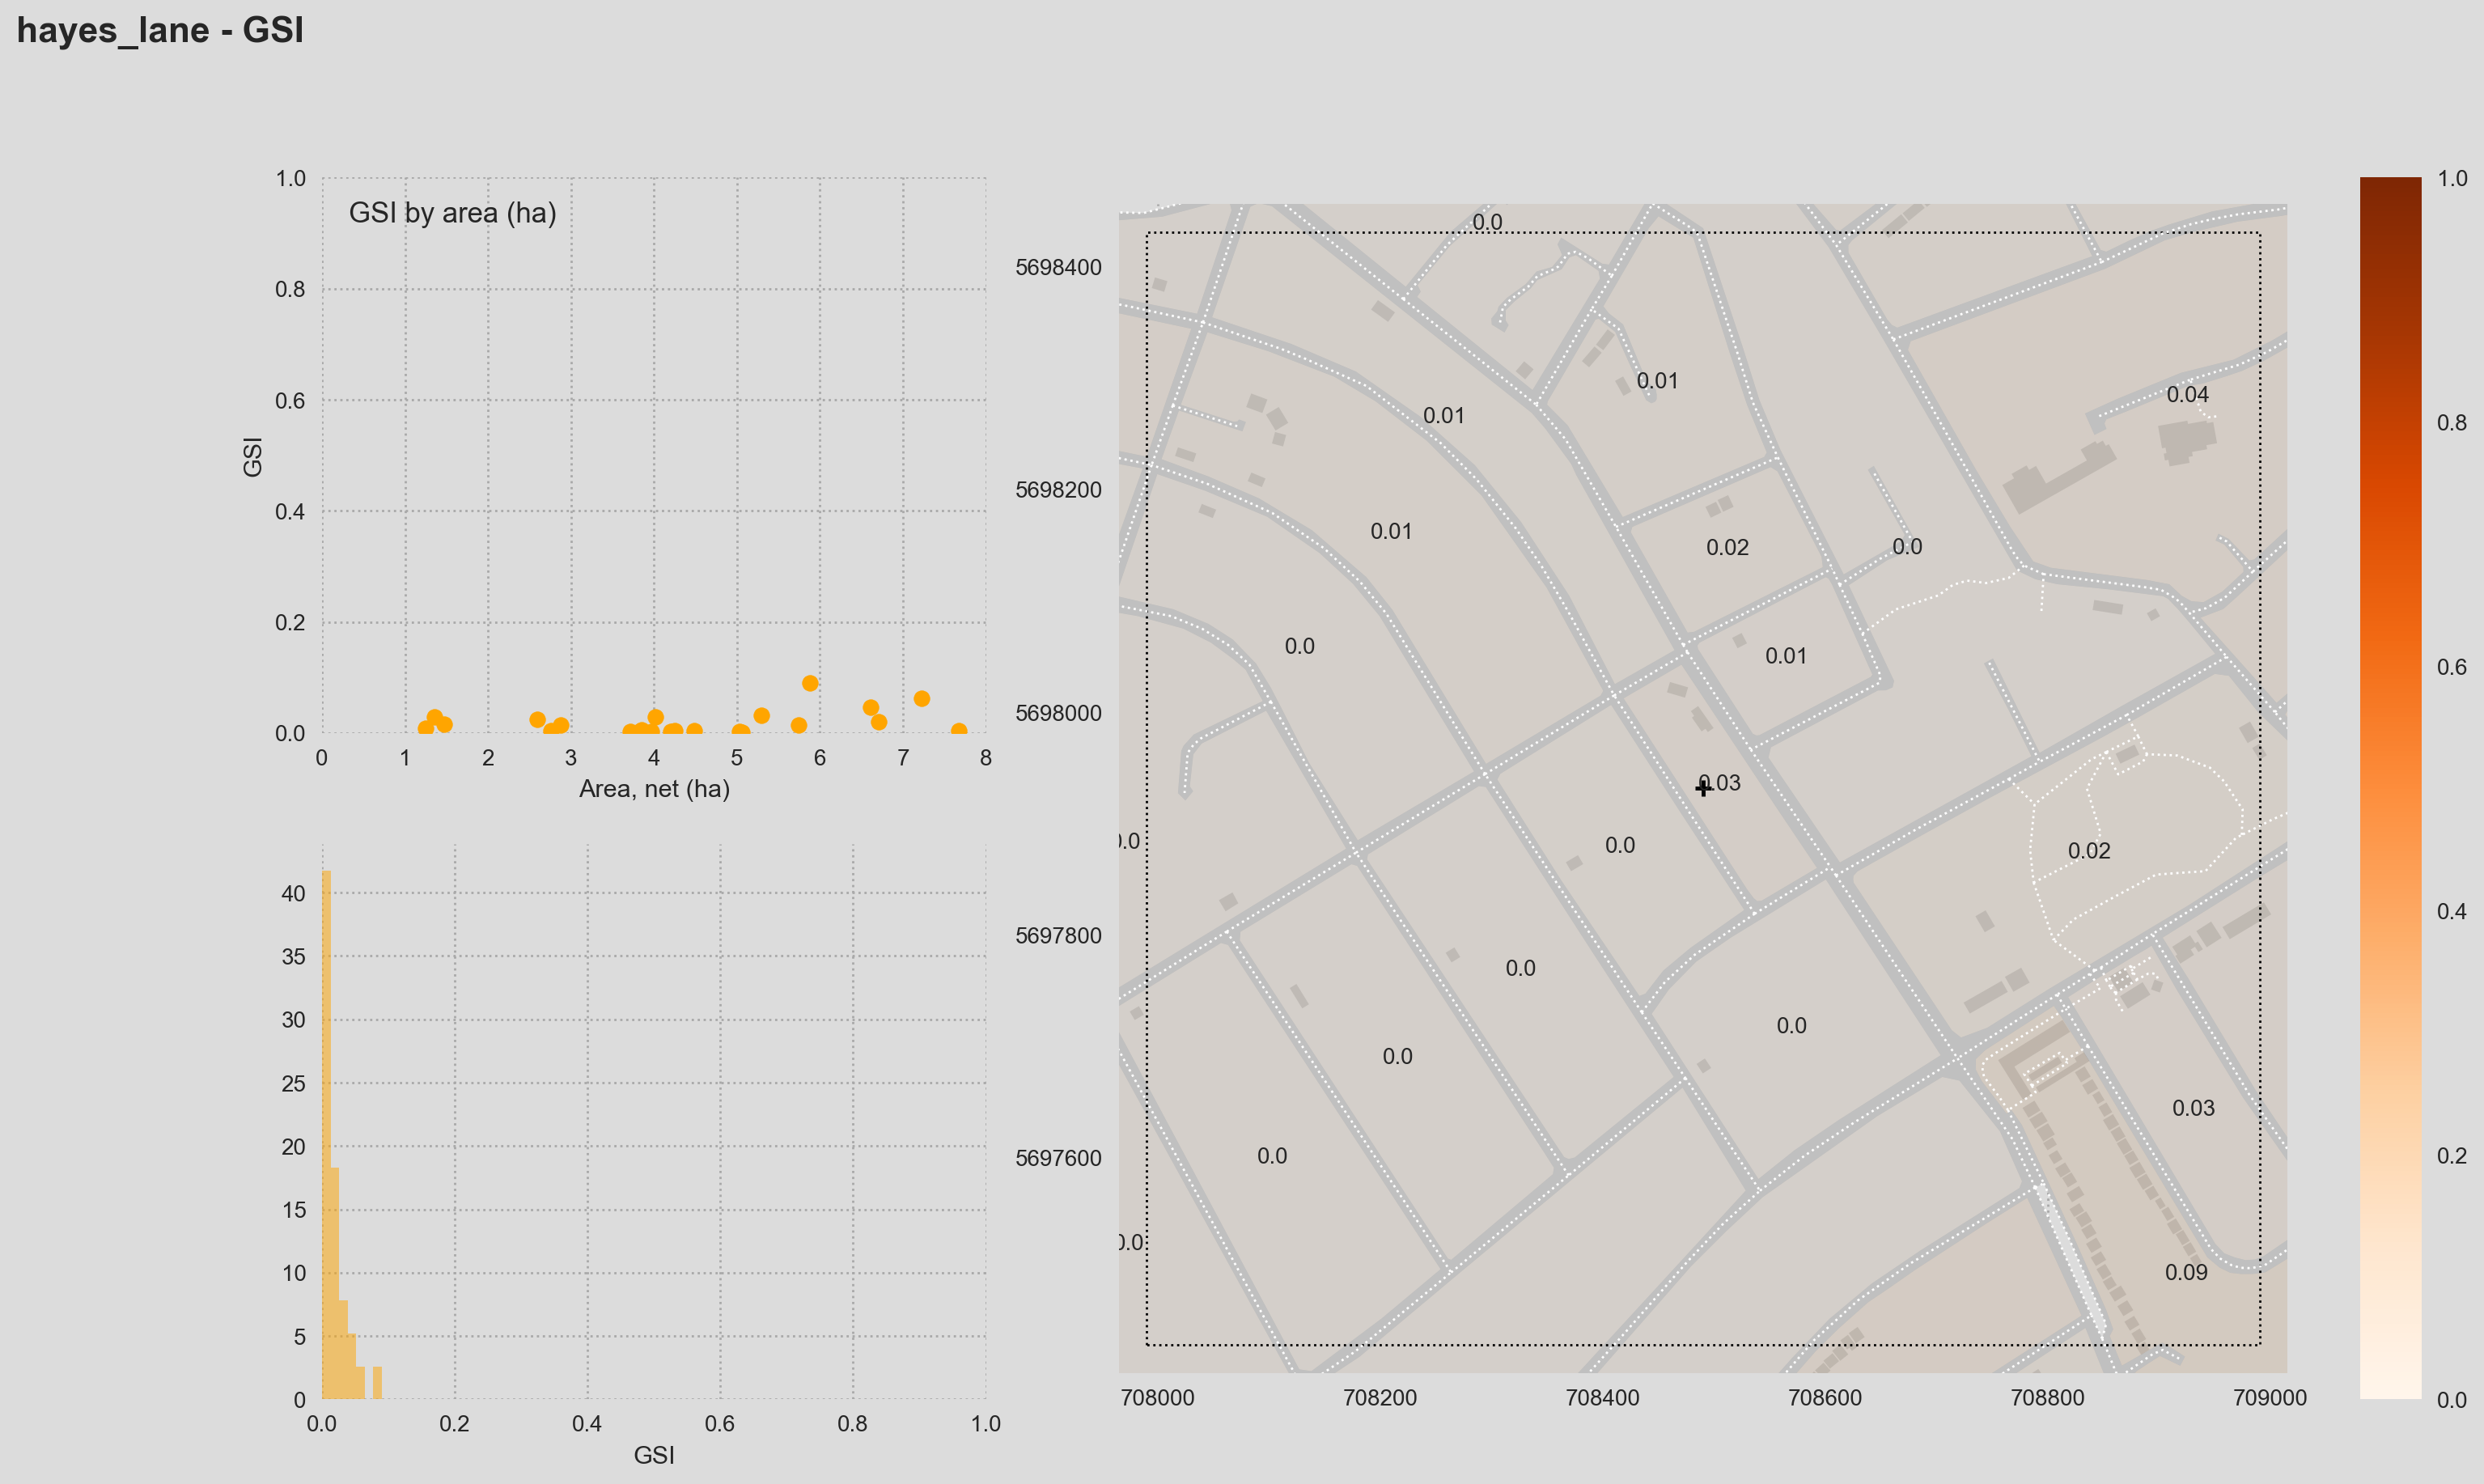

In [10]:
fig, ax = ouf.layout_3_plots()
fig.suptitle(place_name + ' - GSI', fontsize=16, fontweight='bold', ha='left', x=0.02)

ouf.ax_GSI_to_net_area(ax[0], city_blocks)
ouf.ax_GSI_distribution(ax[1], city_blocks)
ouf.ax_map_GSI(ax[2], study_area, streets, city_blocks_gross, city_blocks, buildings)

fig.savefig('../local_images/02_blocks_by_GSI_{}.png'.format(place_name), transparent=False,
            dpi=200, bbox_inches="tight", facecolor='gainsboro')

## 3. Building Heights

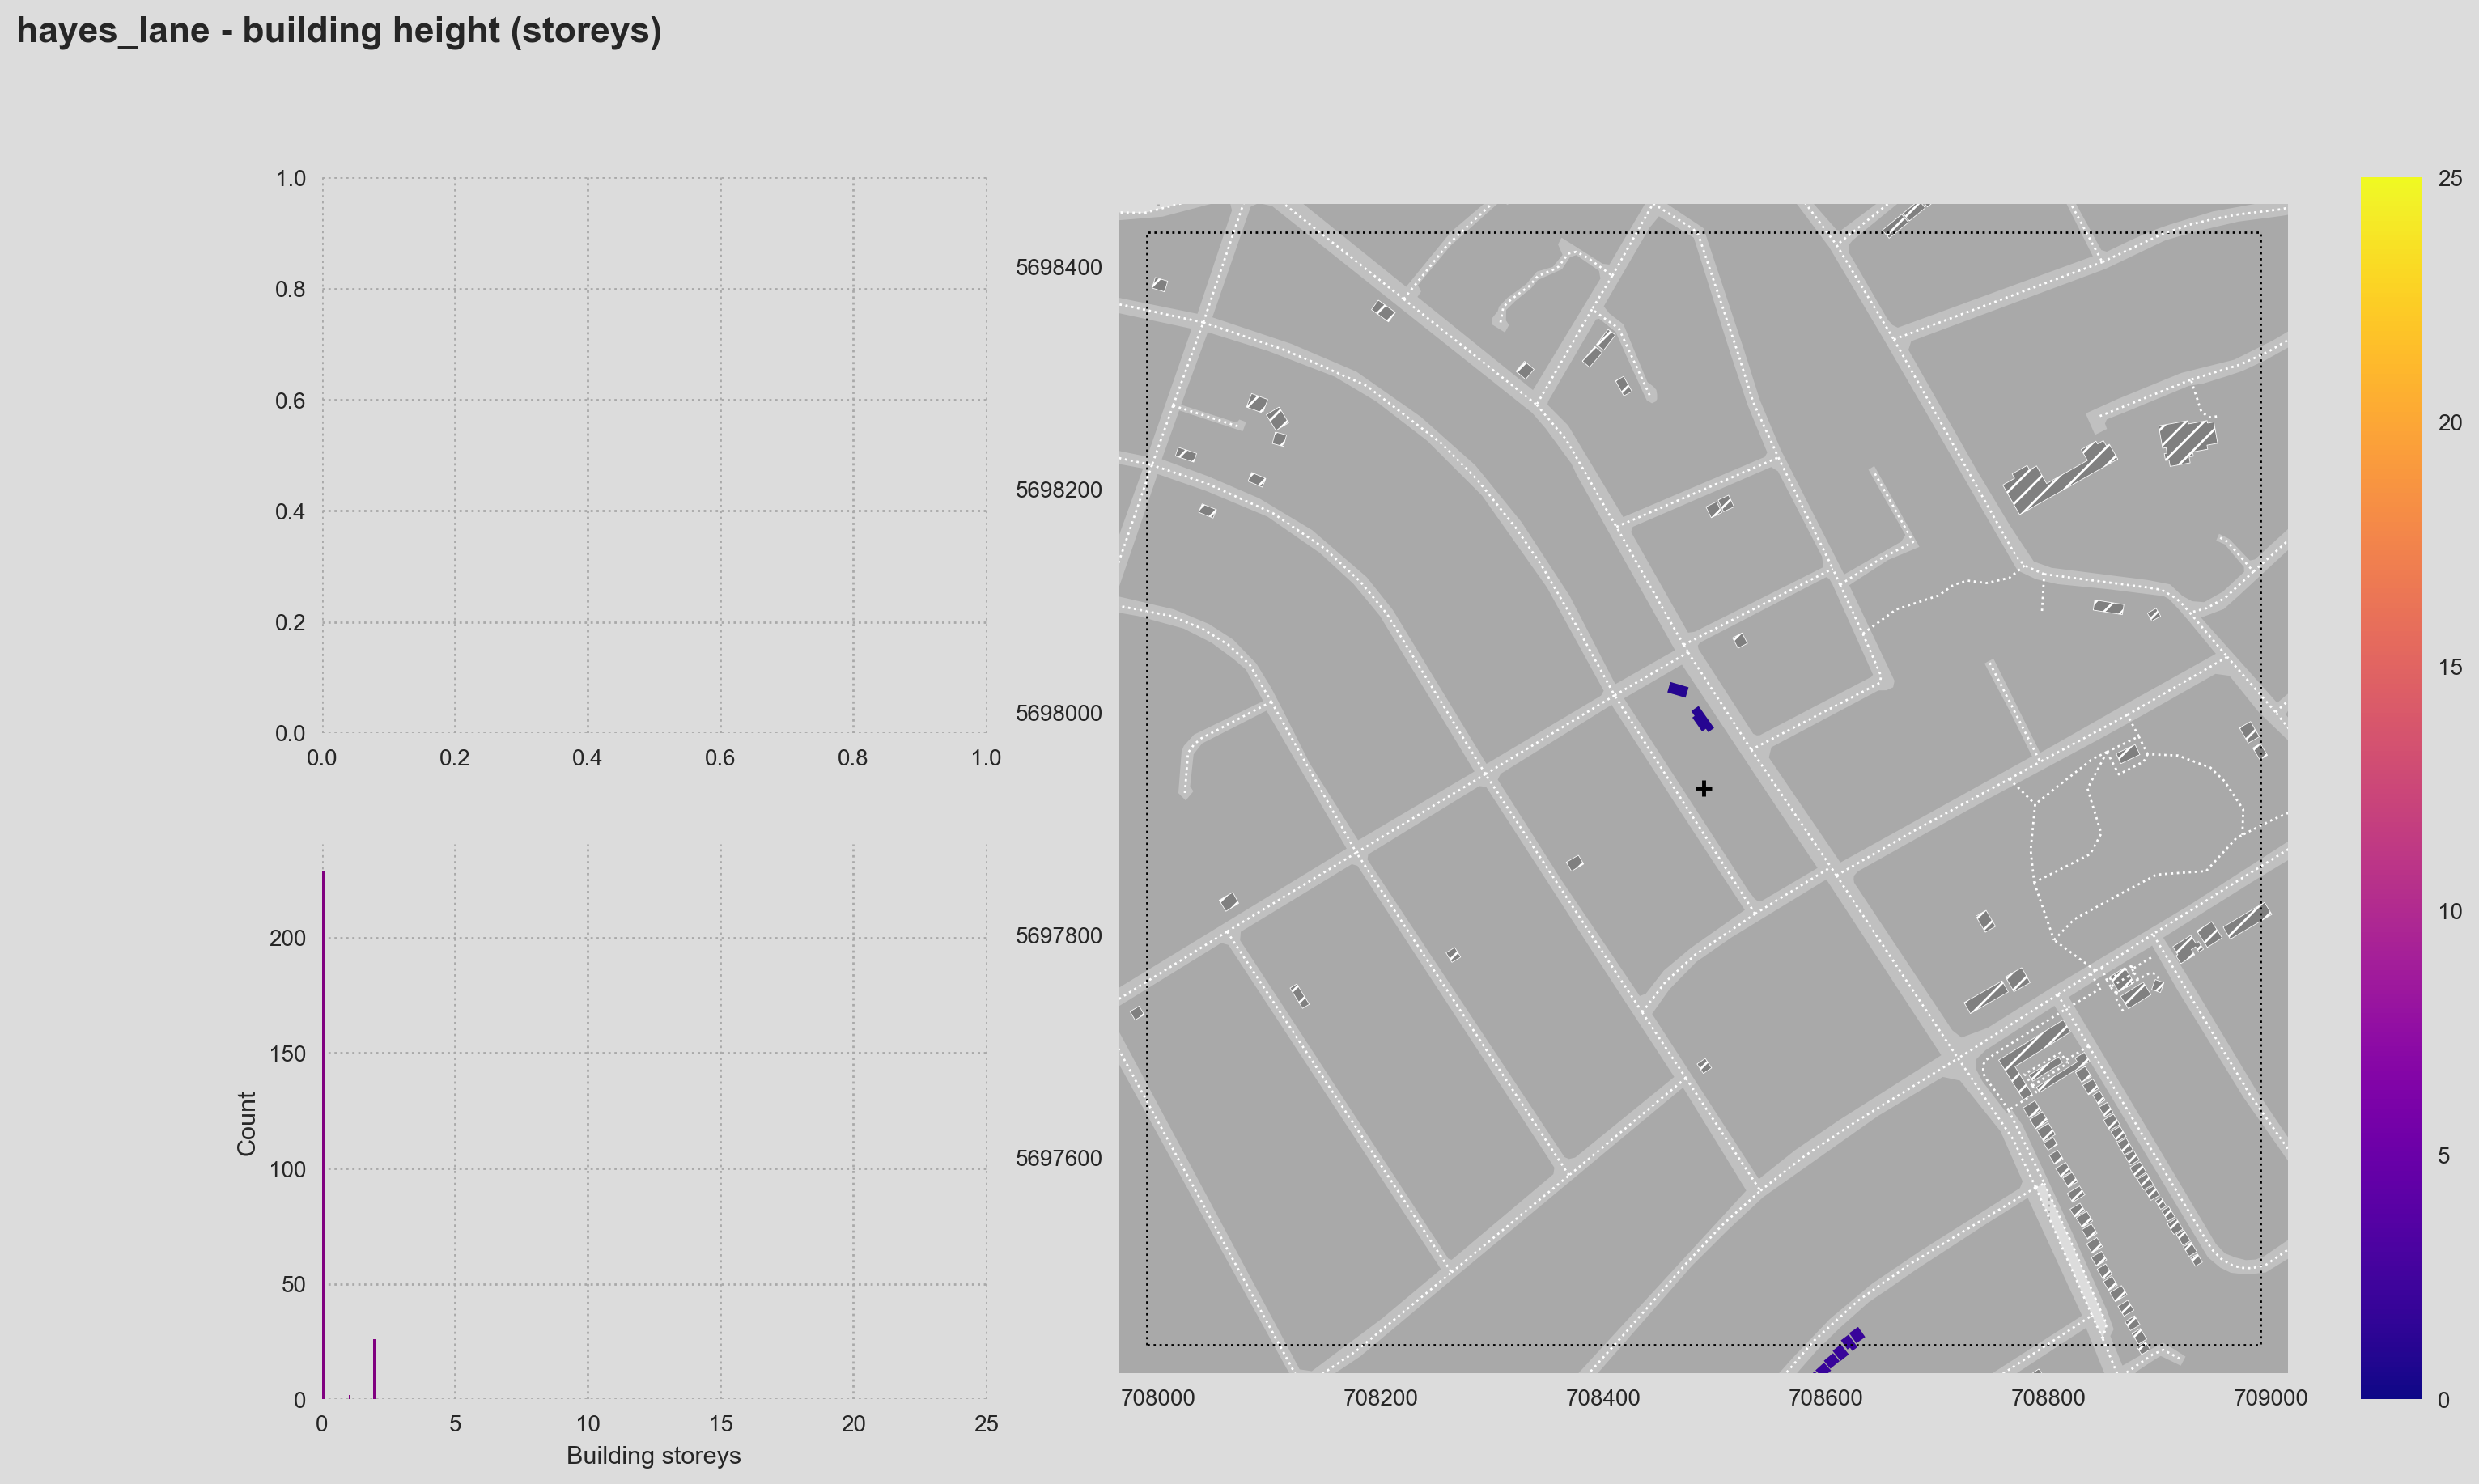

In [11]:
fig, ax = ouf.layout_3_plots()
fig.suptitle(place_name + ' - building height (storeys)', fontsize=16, fontweight='bold', ha='left', x=0.02)

ouf.ax_empty(ax[0])
ouf.ax_building_height_distribution(ax[1], buildings)
ouf.ax_map_building_heights(ax[2], study_area, streets, city_blocks_gross, city_blocks, buildings)

fig.savefig('../local_images/03_building_heights_{}.png'.format(place_name), transparent=False, 
            dpi=200, bbox_inches="tight", facecolor='gainsboro')

## 4. FSI

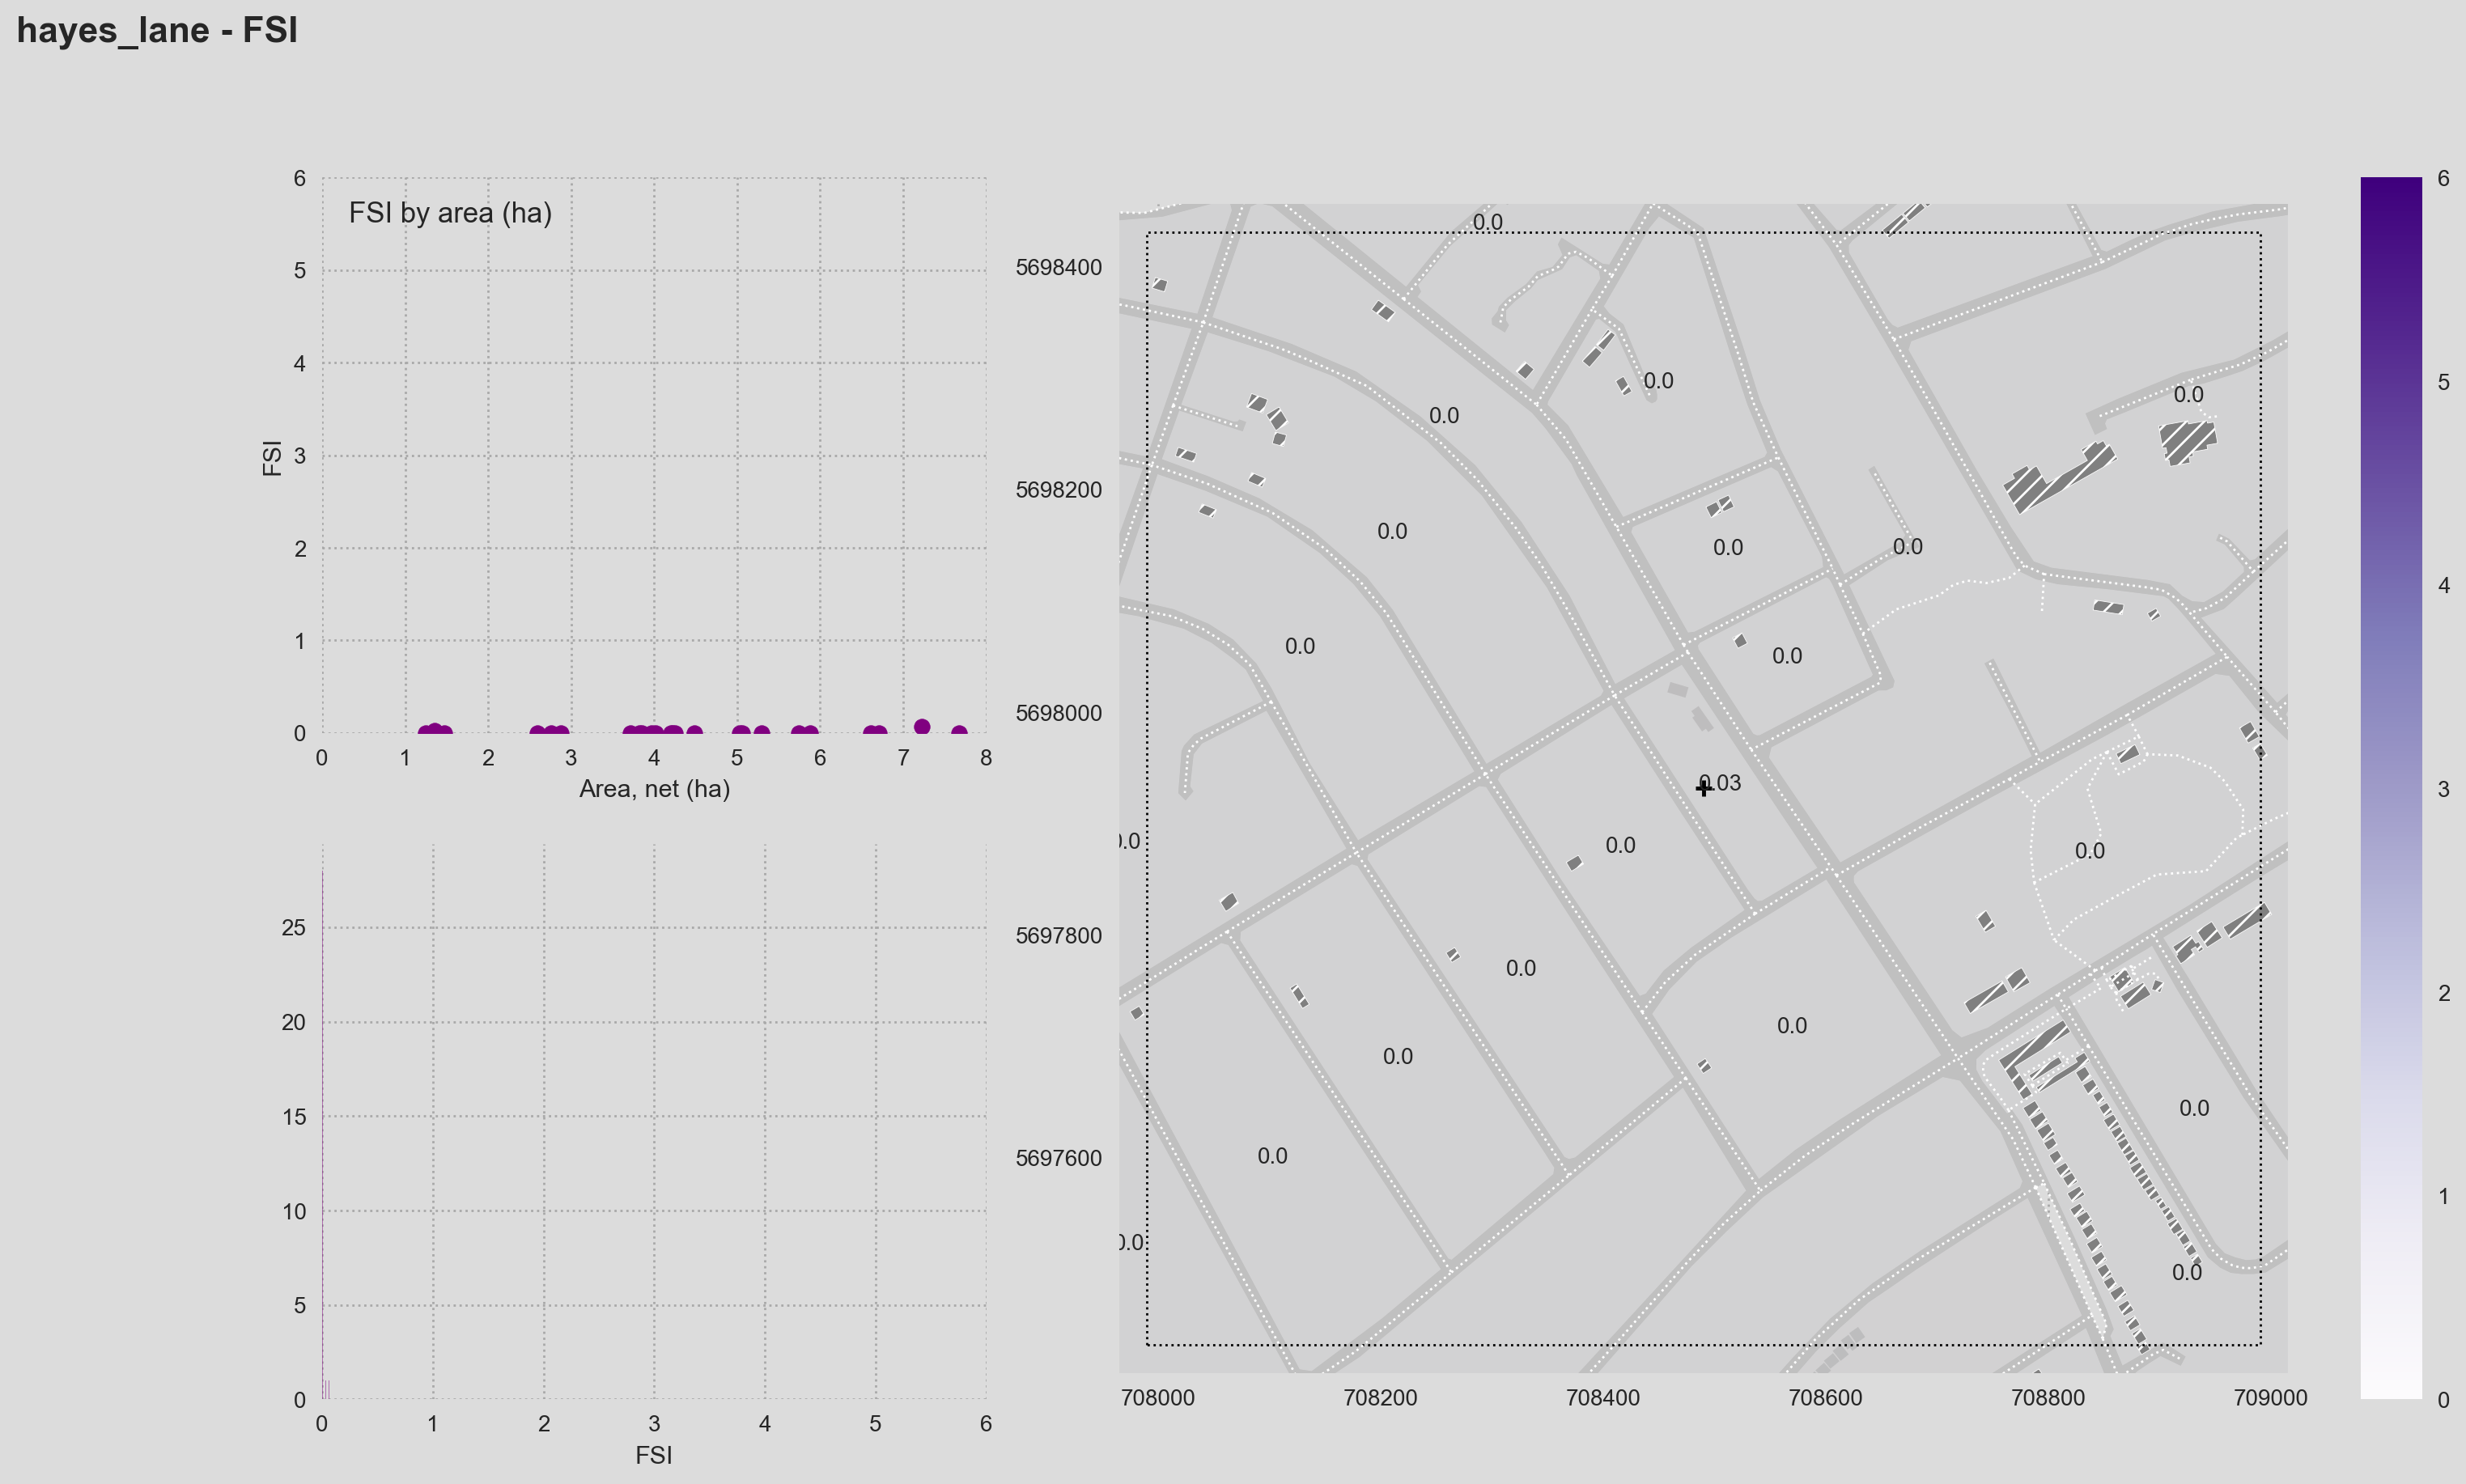

In [12]:
fig, ax = ouf.layout_3_plots()
fig.suptitle(place_name + ' - FSI', fontsize=16, fontweight='bold', ha='left', x=0.02)

ouf.ax_FSI_to_net_area(ax[0], city_blocks)
ouf.ax_FSI_distribution(ax[1], city_blocks)
ouf.ax_map_FSI(ax[2], study_area, streets, city_blocks_gross, city_blocks, buildings)

fig.savefig('../local_images/04_blocks_by_FSI_{}.png'.format(place_name), transparent=False,
            dpi=200, bbox_inches="tight", facecolor='gainsboro')

## 5. SpaceMatrix

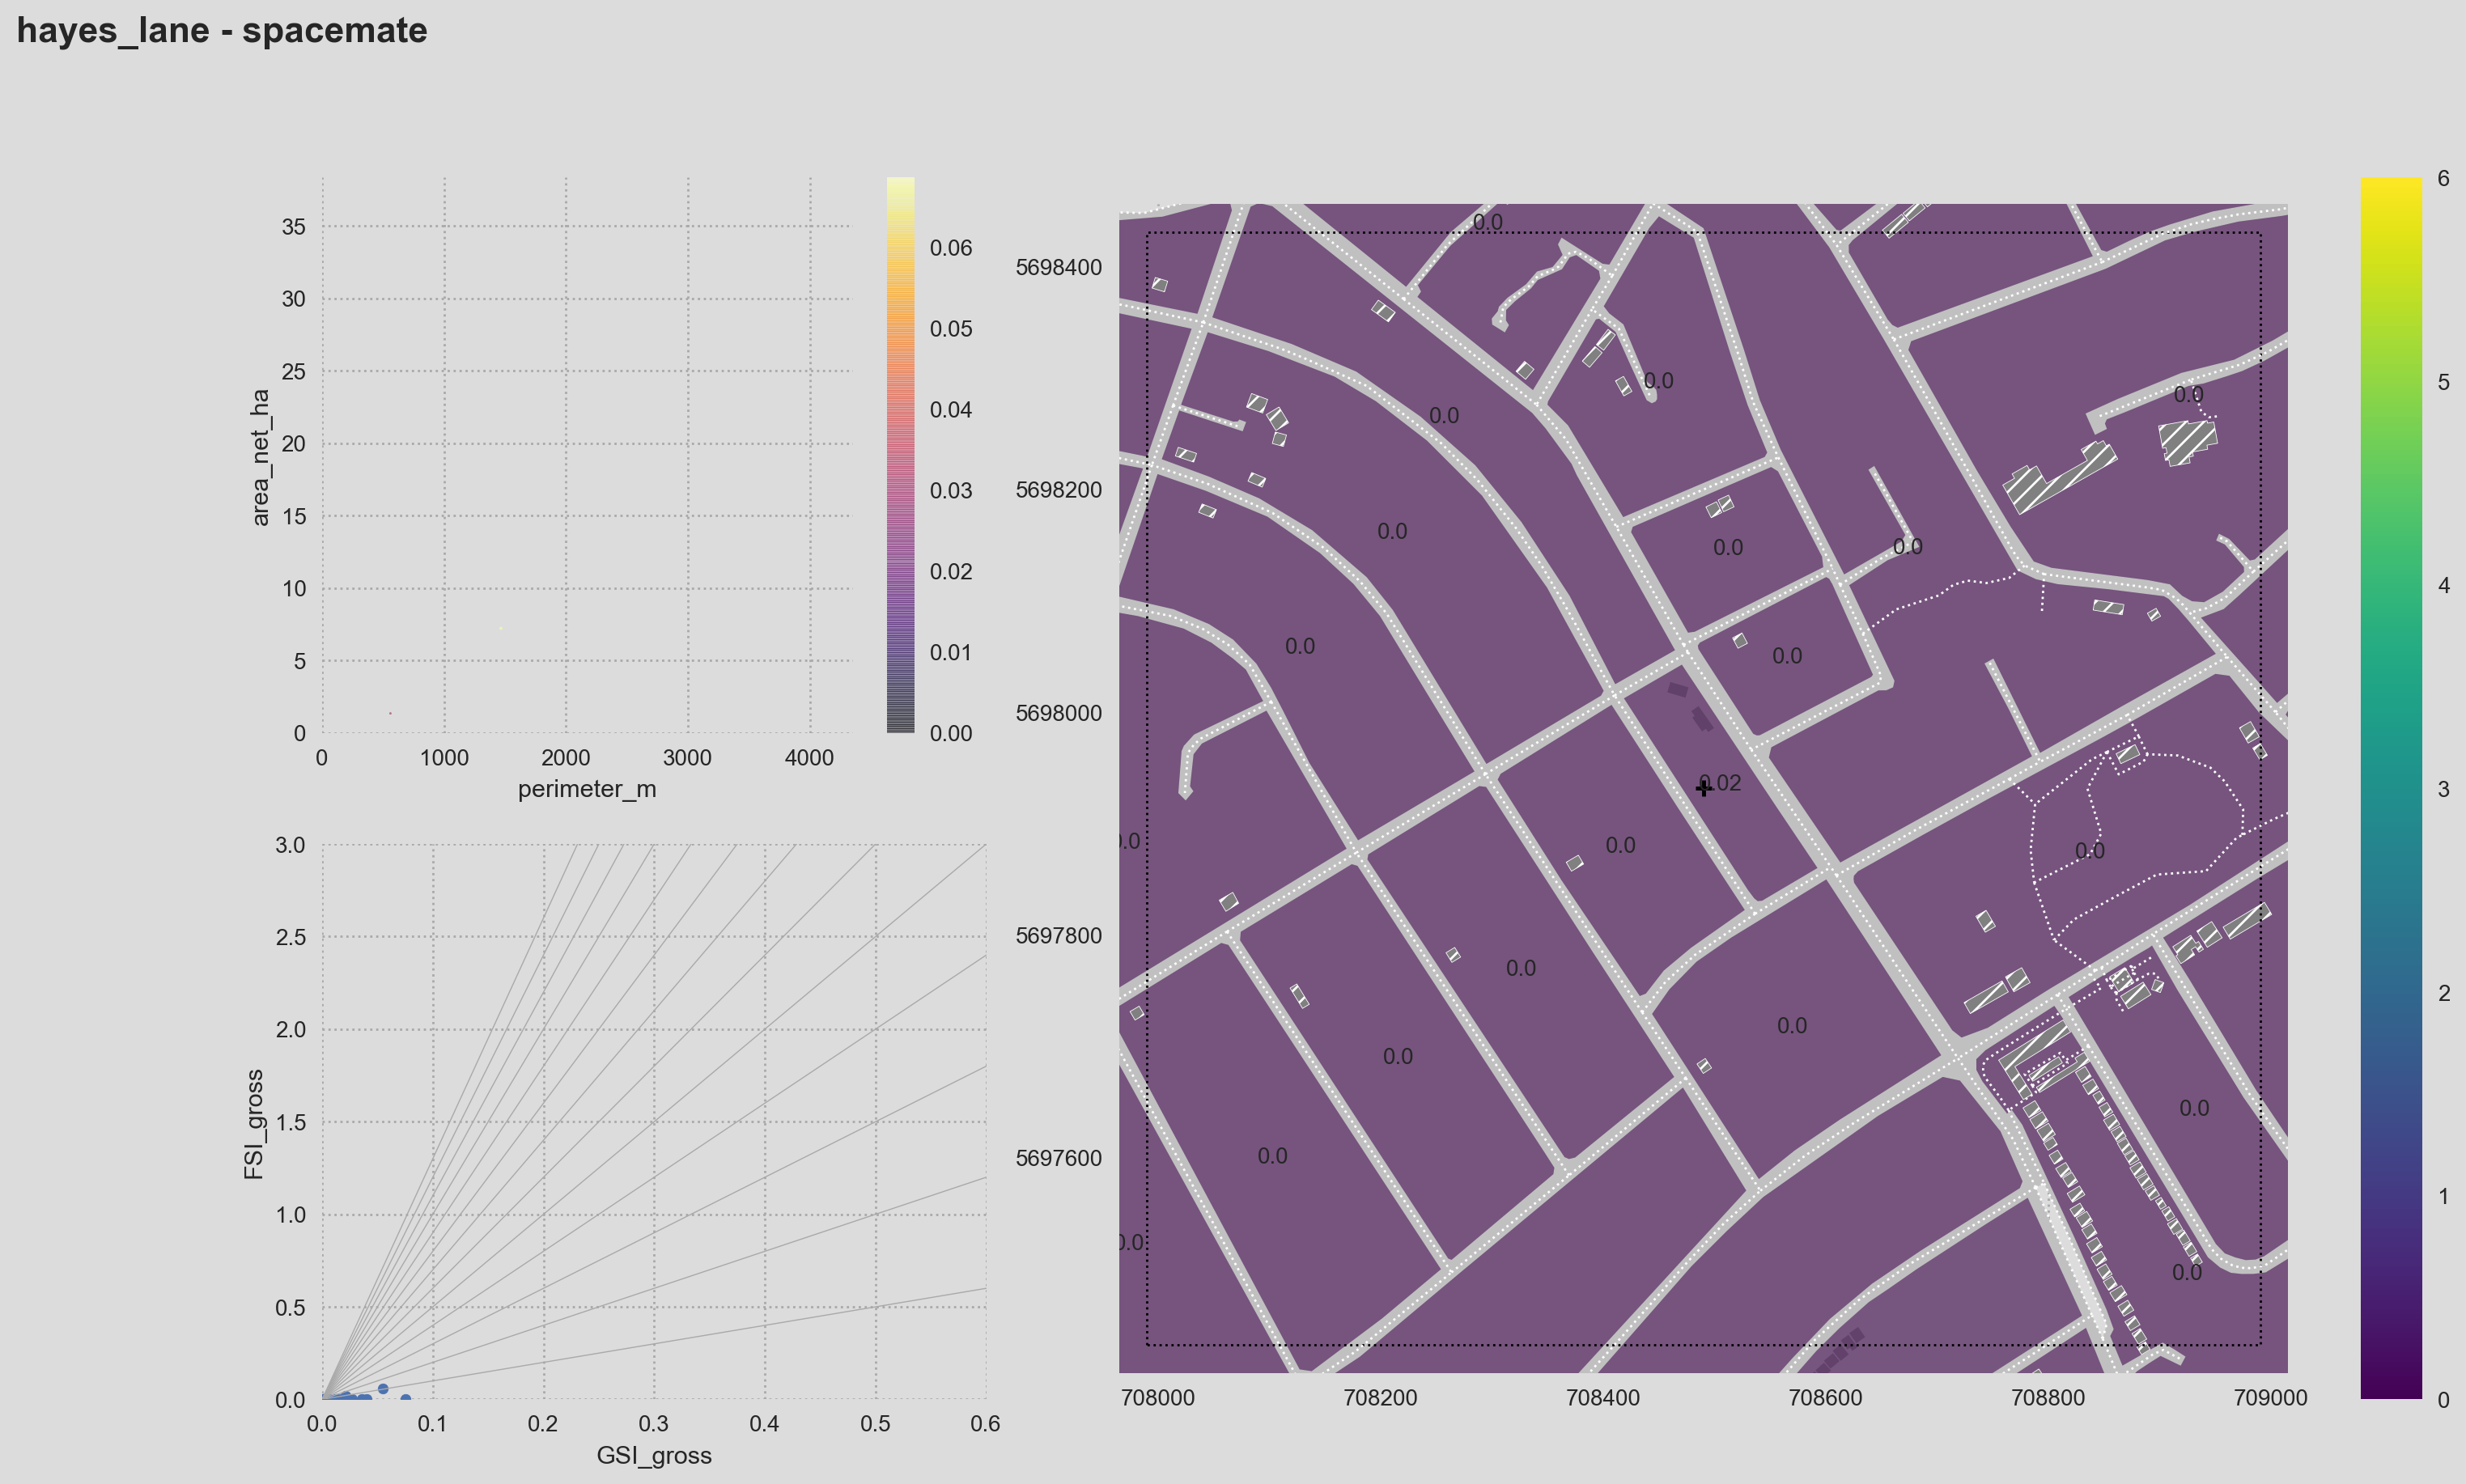

In [13]:
fig, ax = ouf.layout_3_plots()
fig.suptitle(place_name + ' - spacemate', fontsize=16, fontweight='bold', ha='left', x=0.02)

ouf.ax_FSI_perimeter_area(ax[0], city_blocks)
ouf.ax_spacemate(ax[1], city_blocks)
ouf.ax_map_spacemate(ax[2], study_area, streets, city_blocks_gross, city_blocks, buildings)

fig.savefig('../local_images/05_spacematrix_{}.png'.format(place_name), transparent=False,
            dpi=200, bbox_inches="tight", facecolor='gainsboro')